# 1. 

**Eksperyment polega na badaniu ankietowym. Ankieta składa się z $N=4$ pytań. Na każde pytanie można udzielić jednej z trzech możliwych odpowiedzi (a, b, c). Oblicz liczbę wszystkich możliwych wyników tego eksperymentu. Wygeneruj przestrzeń zdarzeń elementarnych.**

In [1]:
import itertools
import pprint
l1 = ['a', 'b', 'c']
l2 = ['1', '2', '3', '4']
p = set(itertools.product(l1, repeat=4))
print("Liczba wszystkich możliwych wyników tego eksperymentu: " + str(len(p)) + "\n")

print("Przestrzeń zdarzeń elementarnych:\n")
pprint.pprint(p)

Liczba wszystkich możliwych wyników tego eksperymentu: 81

Przestrzeń zdarzeń elementarnych:

{('a', 'a', 'a', 'a'),
 ('a', 'a', 'a', 'b'),
 ('a', 'a', 'a', 'c'),
 ('a', 'a', 'b', 'a'),
 ('a', 'a', 'b', 'b'),
 ('a', 'a', 'b', 'c'),
 ('a', 'a', 'c', 'a'),
 ('a', 'a', 'c', 'b'),
 ('a', 'a', 'c', 'c'),
 ('a', 'b', 'a', 'a'),
 ('a', 'b', 'a', 'b'),
 ('a', 'b', 'a', 'c'),
 ('a', 'b', 'b', 'a'),
 ('a', 'b', 'b', 'b'),
 ('a', 'b', 'b', 'c'),
 ('a', 'b', 'c', 'a'),
 ('a', 'b', 'c', 'b'),
 ('a', 'b', 'c', 'c'),
 ('a', 'c', 'a', 'a'),
 ('a', 'c', 'a', 'b'),
 ('a', 'c', 'a', 'c'),
 ('a', 'c', 'b', 'a'),
 ('a', 'c', 'b', 'b'),
 ('a', 'c', 'b', 'c'),
 ('a', 'c', 'c', 'a'),
 ('a', 'c', 'c', 'b'),
 ('a', 'c', 'c', 'c'),
 ('b', 'a', 'a', 'a'),
 ('b', 'a', 'a', 'b'),
 ('b', 'a', 'a', 'c'),
 ('b', 'a', 'b', 'a'),
 ('b', 'a', 'b', 'b'),
 ('b', 'a', 'b', 'c'),
 ('b', 'a', 'c', 'a'),
 ('b', 'a', 'c', 'b'),
 ('b', 'a', 'c', 'c'),
 ('b', 'b', 'a', 'a'),
 ('b', 'b', 'a', 'b'),
 ('b', 'b', 'a', 'c'),
 ('b', 'b

# 2.

**Eksperyment polega na rzucie dwiema uczciwymi kostkami. Jeżeli na obu kostkach wypadnie taka sama liczba oczek, zmienna losowa przyjmuje wartość $x_0=0$, jeśli na pierwszej kostce wypadnie liczba oczek mniejsza niż na drugiej, wówczas zmienna losowa przyjmuje wartość $x_1=1$. Natomiast jeśli na pierwszej kostce wypadnie liczba oczek większa niż na drugiej kostce zmienna losowa przyjmuje wartość $x_2=2$.**

**W języku Python utwórz zmienną losową (wartości i odpowiadające im prawdopodbieństwa) reprezentującą ten eksperyment. Oblicz wartość oczekiwaną i odchylenie standardowe oraz momenty zwykłe rzędu pierwszego i drugiego. Utwórz obiekt rozkładu z biblioteki scipy.stats dla tego przypadku**

**Wykonaj wykres rozkładu prawdopodobieństwa i dystrybuanty tej zmiennej losowej.**

In [2]:
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
X = {0:0, 1:0, 2:0}
for i in range(1,7):
    for j in range(1,7):
        if i == j:
            X[0] += 1  # jeżeli na obu kostkach wypadnie taka sama liczba oczek, zmienna losowa przyjmuje wartość 0
        elif i < j:
            X[1] += 1
        else:
            X[2] += 1

X

{0: 6, 1: 15, 2: 15}

In [4]:
P = sorted(X.items(),key = lambda e:e[0])
P

[(0, 6), (1, 15), (2, 15)]

In [5]:
xk = list()
fk = list()
for e in P:
    xk.append(e[0]) #wartosci
    fk.append(e[1]) #odpowiadajace im prawdopodobienstwa (czestosci)
print(xk)
print(fk)

[0, 1, 2]
[6, 15, 15]


In [6]:
N = sum(fk)
pk = list()
for f in fk:
    pk.append(f/N) 

pk

[0.16666666666666666, 0.4166666666666667, 0.4166666666666667]

In [7]:
sum(pk)

1.0

In [8]:
rozklad = st.rv_discrete(name="Mój rozkład dyskretny",values=(xk,pk))

In [9]:
#wartosc oczekiwana
rozklad.expect()

1.25

In [10]:
#odchylenie standardowe
rozklad.std()

0.7216878364870323

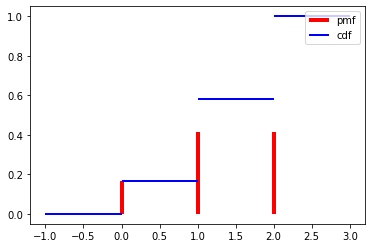

In [11]:
plt.vlines(rozklad.xk, 0, rozklad.pk, colors='r', lw=4)
F = rozklad.cdf(rozklad.xk)
plt.hlines(np.append([0],F), np.append([min(xk)-1],xk), np.append(xk,[max(xk)+1]), colors='b', lw=2)
plt.legend(["pmf","cdf"])

# 3.

Badano ocenę poprawy jakości życia pacjentów z depresją po wprowadzeniu dwóch różnych leków. Zmienna rating określa samopoczucie pacjenta po pewnym czasie stosowania leków. Jedna grupa pacjentów przyjmowała Zoloft druga Desvenlafaxine. Zweryfikuj hipotezę, że Zoloft jest lekiem mniej skutecznym.
Uwaga: Dane na temat samopoczucia nie dotyczą tych samych pacjentów, a dwóch grup różnych pacjentów.

In [12]:
import scipy.stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df = pd.read_csv('/Users/kingaklejne/Desktop/0. KURS/jdszr3-materialy-statystyka/3/Jupyter/ćwiczenia/antidepressant_rating.csv') # import danych do obiektu DataFrame
print(df.columns) # wypisanie nazw kolumn
del df[df.columns[0]] # usunięcie zbędnej kolumny
df.head() # wypisanie kilku początkowych wierszy danych

Index(['Unnamed: 0', 'drugName', 'rating'], dtype='object')


,drugName,rating
0,Mirtazapine,10
1,Escitalopram,9
2,Zoloft,1
3,Effexor XR,1
4,Venlafaxine,8


In [14]:
x = df.loc[df["drugName"]=="Zoloft","rating"].values # pobranie wartości dotyczących leku Zoloft
y = df.loc[df["drugName"]=="Desvenlafaxine","rating"].values # pobranie wartości dotyczących leku Desvenlafaxine

In [15]:
#hipoteza zerowa
st.ttest_ind(x, y, alternative="less")

Ttest_indResult(statistic=-0.138626486654527, pvalue=0.44492590090816)

# 4. 

Dla zbioru danych googleplaystore.csv wykonaj wykresy skrzynkowe (boxplot) dla oceny (Rating) w każdej kategorii ("Category")
Uwaga: prawidłowa ocena zawiera się w przedziale [1,5]

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


file_path = '/Users/kingaklejne/Desktop/0. KURS/jdszr3-materialy-statystyka/3/Jupyter/ćwiczenia/googleplaystore.csv'

#print(os.path.dirname(file_path))

df = pd.read_csv(file_path)

In [17]:
df = df[df.columns[1:3]]
df

,Category,Rating
0,ART_AND_DESIGN,4.1
1,ART_AND_DESIGN,3.9
2,ART_AND_DESIGN,4.7
3,ART_AND_DESIGN,4.5
4,ART_AND_DESIGN,4.3
...,...,...
10836,FAMILY,4.5
10837,FAMILY,5.0
10838,MEDICAL,NaN
10839,BOOKS_AND_REFERENCE,4.5


In [18]:
print(df['Category'].unique())

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


In [19]:
#null values
missing_data = df.isnull().sum()
missing_data

Category       0
Rating      1474
dtype: int64

In [20]:
print(not df['Category'].count() == len(df['Category']) ) #Czy DataFrame zawiera obserwacje NaN?

False


In [21]:
print(not df['Rating'].count() == len(df['Rating']) ) #Czy DataFrame zawiera obserwacje NaN?

True


In [22]:
#usuwanie na
df = df.dropna()

In [23]:
#sprawdzenie czy sa wartosci powyzej 5
df[(df['Rating'] > 5)]

,Category,Rating
10472,1.9,19.0


In [24]:
print(df.loc[df['Rating'] == 19])

      Category  Rating
10472      1.9    19.0


In [25]:
df = df.drop(labels = 10472, axis = 0)

In [26]:
df[(df['Rating'] > 5)]

,Category,Rating


/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


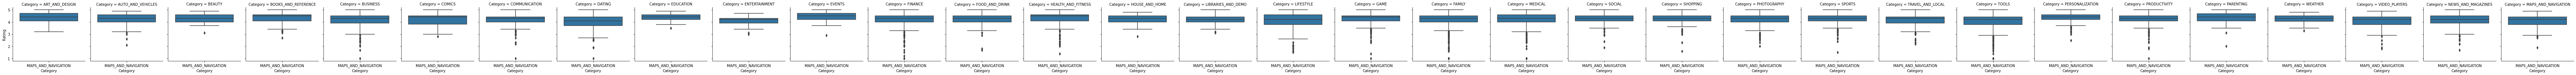

In [27]:
#wykresy skrzynkowe - osobne

import seaborn as sns
g = sns.FacetGrid(df, col="Category")
g.map(sns.boxplot, 'Category', 'Rating')

[Text(0, 0, 'ART_AND_DESIGN'),
 Text(1, 0, 'AUTO_AND_VEHICLES'),
 Text(2, 0, 'BEAUTY'),
 Text(3, 0, 'BOOKS_AND_REFERENCE'),
 Text(4, 0, 'BUSINESS'),
 Text(5, 0, 'COMICS'),
 Text(6, 0, 'COMMUNICATION'),
 Text(7, 0, 'DATING'),
 Text(8, 0, 'EDUCATION'),
 Text(9, 0, 'ENTERTAINMENT'),
 Text(10, 0, 'EVENTS'),
 Text(11, 0, 'FINANCE'),
 Text(12, 0, 'FOOD_AND_DRINK'),
 Text(13, 0, 'HEALTH_AND_FITNESS'),
 Text(14, 0, 'HOUSE_AND_HOME'),
 Text(15, 0, 'LIBRARIES_AND_DEMO'),
 Text(16, 0, 'LIFESTYLE'),
 Text(17, 0, 'GAME'),
 Text(18, 0, 'FAMILY'),
 Text(19, 0, 'MEDICAL'),
 Text(20, 0, 'SOCIAL'),
 Text(21, 0, 'SHOPPING'),
 Text(22, 0, 'PHOTOGRAPHY'),
 Text(23, 0, 'SPORTS'),
 Text(24, 0, 'TRAVEL_AND_LOCAL'),
 Text(25, 0, 'TOOLS'),
 Text(26, 0, 'PERSONALIZATION'),
 Text(27, 0, 'PRODUCTIVITY'),
 Text(28, 0, 'PARENTING'),
 Text(29, 0, 'WEATHER'),
 Text(30, 0, 'VIDEO_PLAYERS'),
 Text(31, 0, 'NEWS_AND_MAGAZINES'),
 Text(32, 0, 'MAPS_AND_NAVIGATION')]

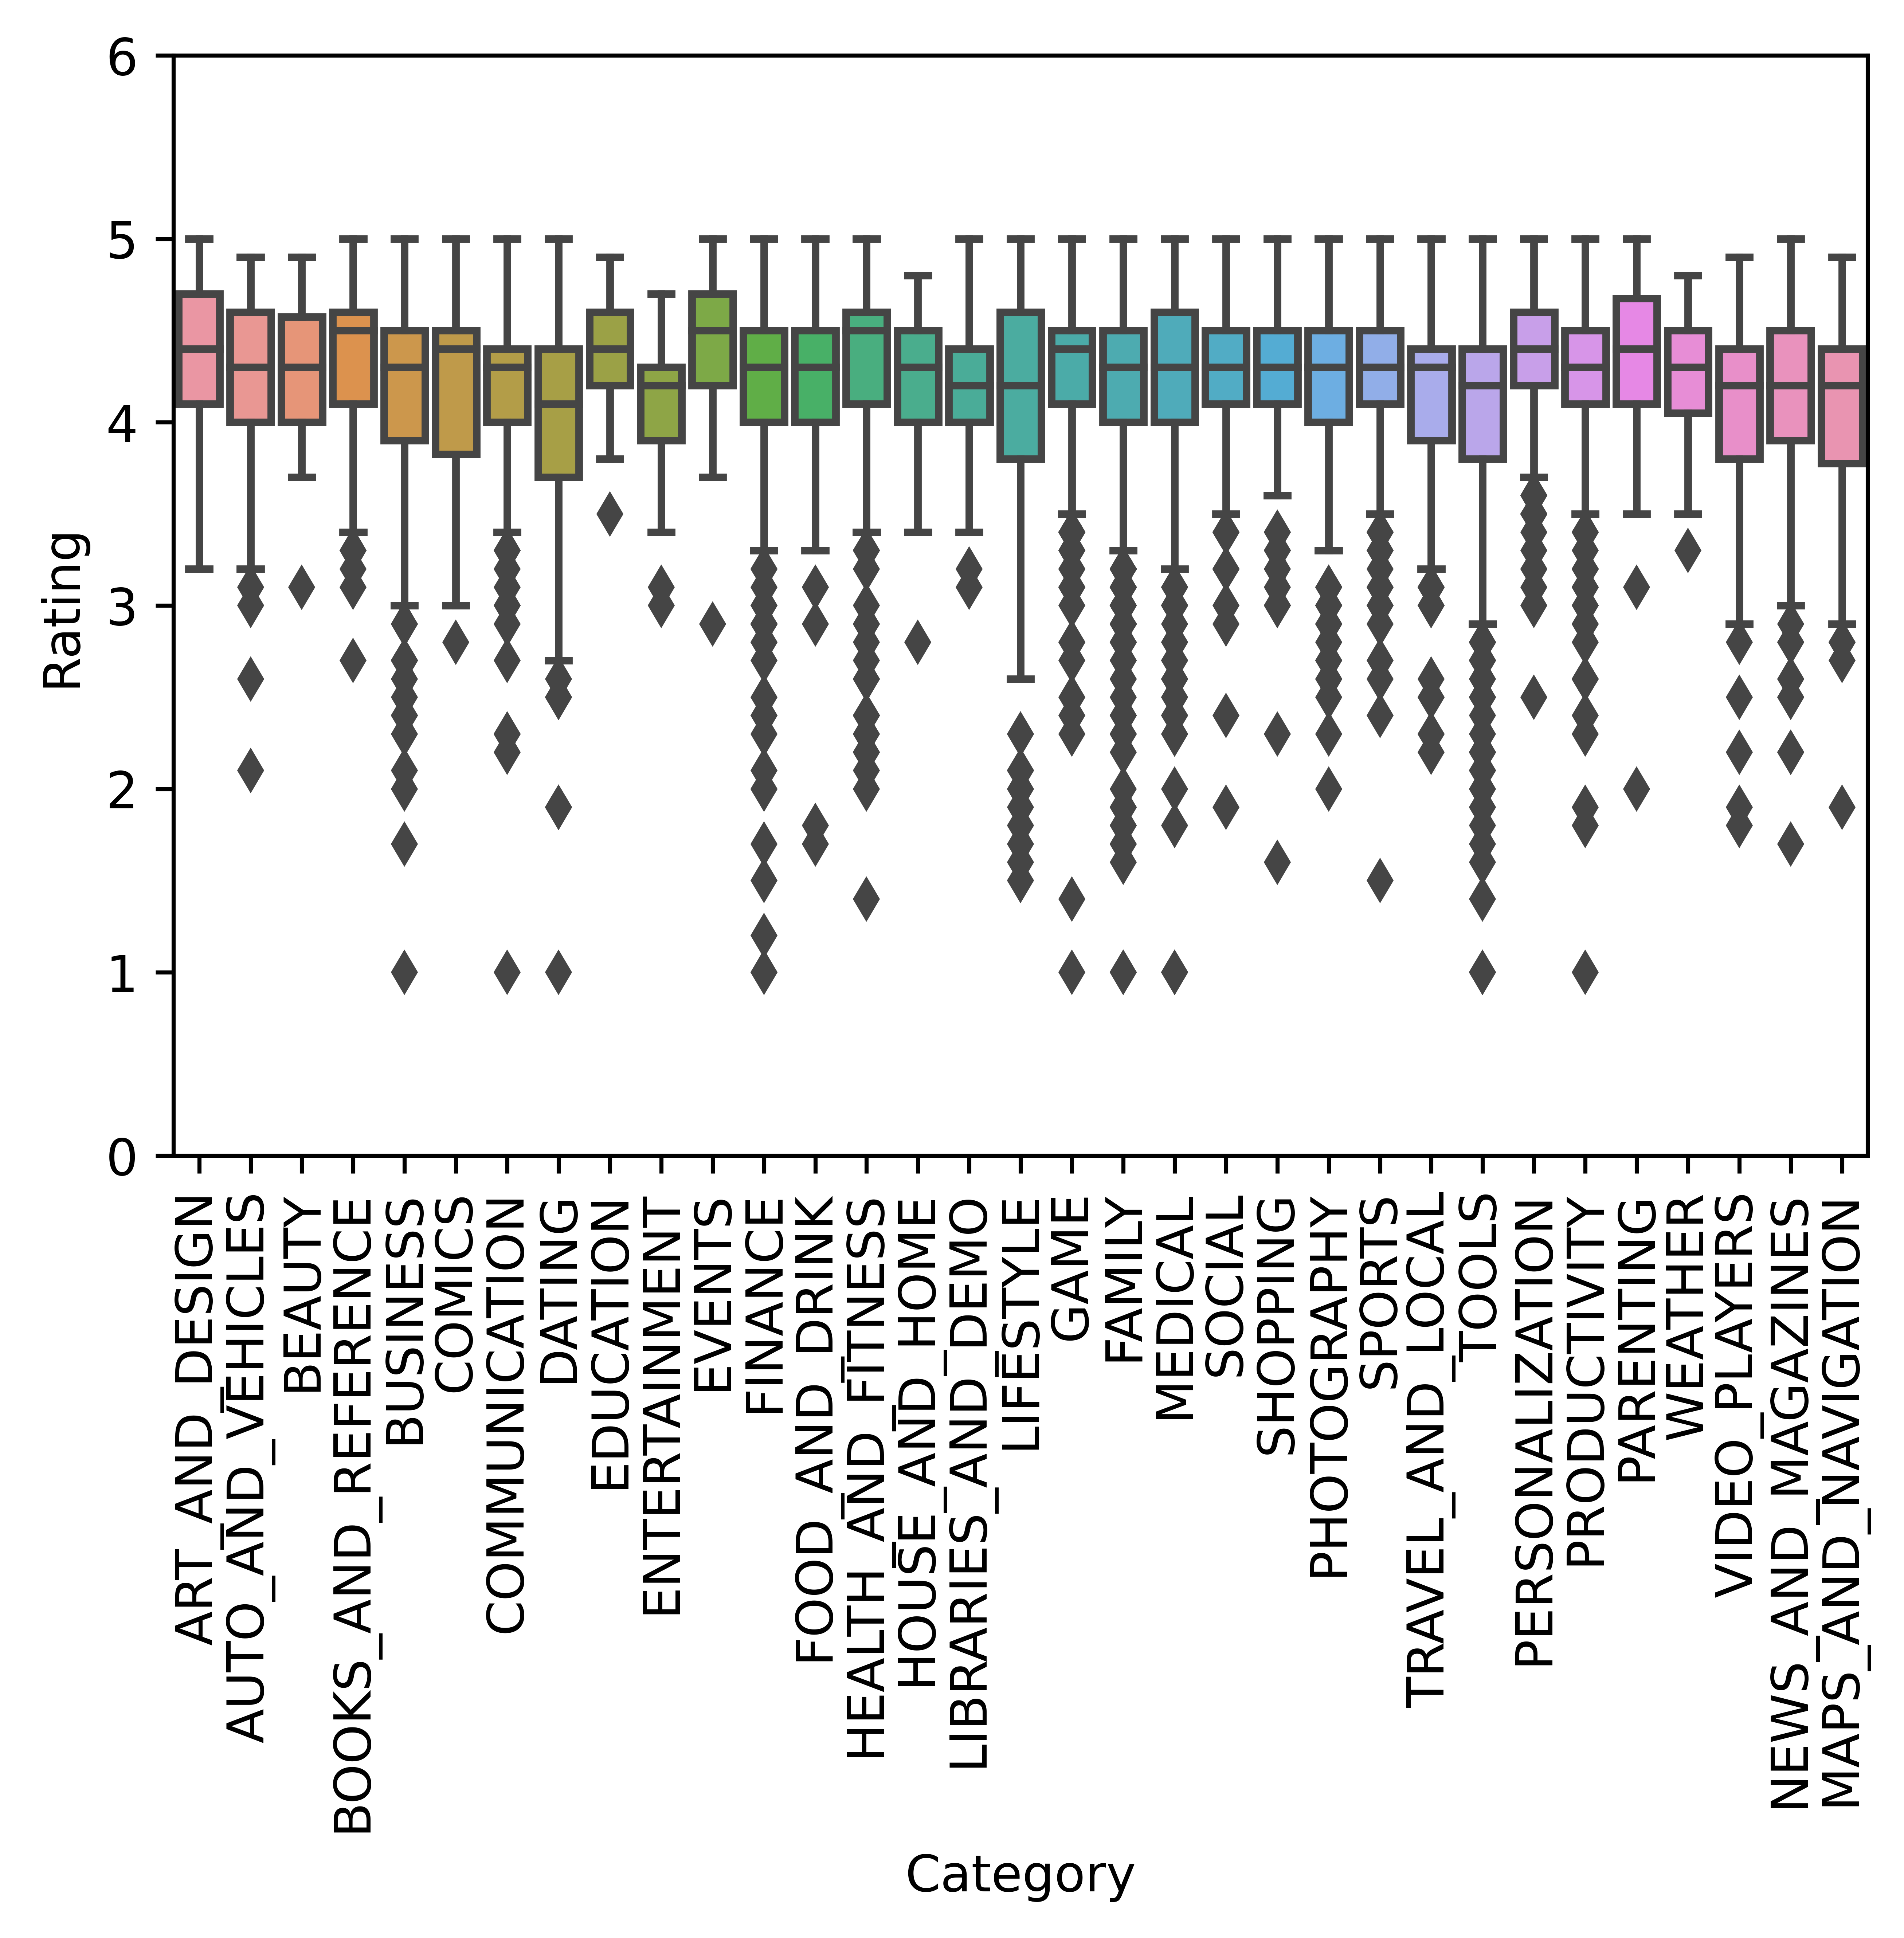

In [28]:
#wykresy skrzynkowe - wspolne
import matplotlib
matplotlib.rcParams['figure.dpi']= 1000

plt.ylim(ymin=0, ymax = 6)
chart = sns.boxplot(x = 'Category', y = 'Rating', data = df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

# 5.

Przy pomocy testu Kołmogorowa-Smirnowa sprawdź czy zmienna Rating ma rozkład normalny. Obliczenia wykonaj samodzielnie oraz wykorzystując funkcję testu kołomogorowa z moduły scipy

In [29]:
import numpy as np
import scipy as sp
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
file_path = '/Users/kingaklejne/Desktop/0. KURS/jdszr3-materialy-statystyka/3/Jupyter/ćwiczenia/googleplaystore.csv'

x = pd.read_csv(file_path)
x = x[x.columns[2:3]]

x

,Rating
0,4.1
1,3.9
2,4.7
3,4.5
4,4.3
...,...
10836,4.5
10837,5.0
10838,NaN
10839,4.5


In [31]:
x = x.dropna()
x

,Rating
0,4.1
1,3.9
2,4.7
3,4.5
4,4.3
...,...
10834,4.0
10836,4.5
10837,5.0
10839,4.5


In [32]:
x[(x['Rating'] > 5)]

,Rating
10472,19.0


In [33]:
x = x.drop(labels = 10472, axis = 0)

In [34]:
x[(x['Rating'] > 5)]

,Rating


In [35]:
x = x.values

In [36]:
N = len(x) # wielkość próby
x = x.reshape(N,)
x

array([4.1, 3.9, 4.7, ..., 5. , 4.5, 4.5])

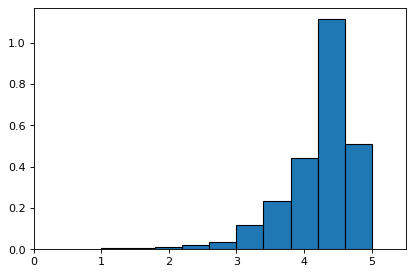

In [37]:
matplotlib.rcParams['figure.dpi']= 80


plt.xlim(xmin=0, xmax = 5.5)
plt.hist(x, density=True, edgecolor="black")
pass

In [38]:
m = st.tmean(x)
s = st.tstd(x)

rozkladNormalny = st.norm(m,s)

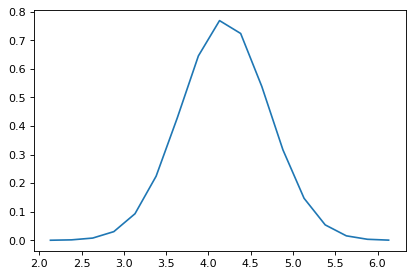

In [39]:
xl = np.arange(m-4*s,m+4*s,0.25)
f = rozkladNormalny.pdf(xl)
plt.plot(xl,f)

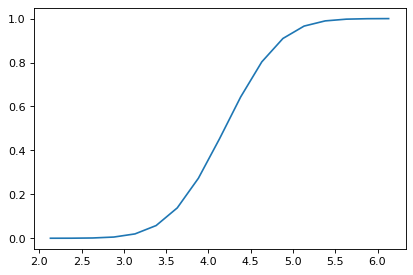

In [40]:
f = rozkladNormalny.cdf(xl)
plt.plot(xl,f)

In [41]:
xs = np.sort(x) #sortowanie próby
F = rozkladNormalny.cdf(xs) # dystrybuanta rozkładu teoretycznego
Fni = np.fromiter(range(1,N+1),dtype=int)/N # dystrybuanta empiryczna (z próby)

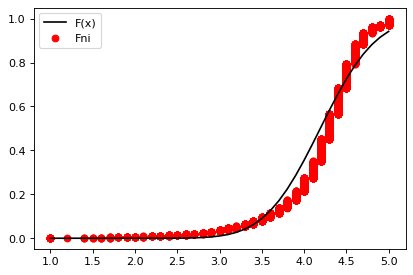

In [42]:
plt.plot(xs,F,color="black")
plt.scatter(xs,Fni,color="red")
plt.legend(["F(x)","Fni"])
pass

In [43]:
rozkladKolmogorowaSmirnowa = st.kstwobign() # utworzenie instancji obiektu reprezentującego rozkald KS

Dn = max(np.abs(F-Fni)) # obliczenie statystyki testowej - maksymalnej różnicy między dystrybuantami
stTest = np.sqrt(N)*Dn
pvalue = 1 - rozkladKolmogorowaSmirnowa.cdf(stTest) # obliczenie p-wartości

print("Statystyka testowa Dn = {}; pvalue = {}".format(stTest,pvalue))

Statystyka testowa Dn = 15.166393085633784; pvalue = 0.0


In [44]:
st.kstest(x,rozkladNormalny.cdf)

KstestResult(statistic=0.15681984375006952, pvalue=1.2230126081584406e-201)